<a href="https://colab.research.google.com/github/AntoniaAcevedo/ADA-Informe/blob/main/Informe4_ADA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema de ordenamiento
**Entrada**: Secuencia de n números $[a_1,a_2,...,a_n]$

**Salida**: Permutación ordenada de la secuencia de entrada: $[a_1',a_2',...,a_n']$, de tal manera que $a_1'\leq a_2' \leq... \leq a_n'$.

![image](https://i.imgur.com/LbdnIIA.jpg)

>Continuando con el paradigma de **divide y venceras** el algoritmo QuickSort comienza con un problema el cual divide en tres subproblemas mas pequeños los cuales son:
>- el pivote, este es el numero o valor que se encuentra en el final del problema original con el que despues se comparan el resto de numeros o valores.

>- el lado derecho o ' i ', donde se posicionan los numeros o valores mayores que el pivote.

>- el lado izquierdo o ' j ', donde se posicionan los numeros o valores menores o iguales que el pivote.




#2. QuickSort

El siguiente código muestra una implementación del algoritmo **QuickSort**.

##2.1 Codigo 

In [ ]:
from termcolor import colored

def partition(array, low, high, t, verbose = False):
  pivot = array[high]
  i = low - 1
  for j in range(low, high):
    t += 1

    if array[j] <= pivot:
      i = i + 1
      (array[i], array[j]) = (array[j], array[i])
    if verbose:
      print("\n Iteracion",t)
      print(str(array)[1:-1])
  (array[i + 1], array[high]) = (array[high], array[i + 1])

  return i + 1,t

def quicksort(array, low, high, t, verbose = False):
  if low < high:
    pi, t = partition(array, low, high, t, verbose)
    t = quicksort(array, low, pi - 1, t, verbose)
    t = quicksort(array, pi + 1, high, t, verbose)
  return t
  
A = [5,8,7,1,3]
print("Entrada: ",A)
h= len(A) - 1
t= quicksort(A, 0, h, 0)
print("Salida: ",A)
print("# comparaciones: ",t)


Entrada:  [5, 8, 7, 1, 3]
Salida:  [1, 3, 5, 7, 8]
# comparaciones:  7


##2.2 Descripcion del algoritmo


##2.3 Ejemplo 

## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en cada iteración del algoritmo.

In [ ]:
import random
a = random.sample(range(1, 100), 8)
h= len(a) - 1
t= quicksort(a, 0, h, 0, True)
print("# comparaciones: ", t)


 Iteracion 1
64, 63, 62, 55, 72, 29, 40, 44

 Iteracion 2
64, 63, 62, 55, 72, 29, 40, 44

 Iteracion 3
64, 63, 62, 55, 72, 29, 40, 44

 Iteracion 4
64, 63, 62, 55, 72, 29, 40, 44

 Iteracion 5
64, 63, 62, 55, 72, 29, 40, 44

 Iteracion 6
29, 63, 62, 55, 72, 64, 40, 44

 Iteracion 7
29, 40, 62, 55, 72, 64, 63, 44

 Iteracion 8
29, 40, 44, 55, 72, 64, 63, 62

 Iteracion 9
29, 40, 44, 55, 72, 64, 63, 62

 Iteracion 10
29, 40, 44, 55, 72, 64, 63, 62

 Iteracion 11
29, 40, 44, 55, 72, 64, 63, 62

 Iteracion 12
29, 40, 44, 55, 72, 64, 63, 62

 Iteracion 13
29, 40, 44, 55, 62, 64, 63, 72

 Iteracion 14
29, 40, 44, 55, 62, 64, 63, 72

 Iteracion 15
29, 40, 44, 55, 62, 64, 63, 72
# comparaciones:  15


#3. Tiempo de ejecucion

###Ejemplo

In [ ]:
a =[2,3,4,1];
print("Entrada no ordenada:",a)
h= len(a) - 1
t= quicksort(a, 0, h, 0, True)
print("Salida ordenada:",a)
print("Total de comparaciones realizadas:",t)

Entrada no ordenada: [2, 3, 4, 1]

 Iteracion 1
2, 3, 4, 1

 Iteracion 2
2, 3, 4, 1

 Iteracion 3
2, 3, 4, 1

 Iteracion 4
1, 3, 4, 2

 Iteracion 5
1, 3, 4, 2

 Iteracion 6
1, 2, 4, 3
Salida ordenada: [1, 2, 3, 4]
Total de comparaciones realizadas: 6


#4. Correctitud

#5. Experimentos


##5.1 Número de comparaciones

In [ ]:
#Mejor caso
a = random.sample(range(1, 100), 1)
h= len(a) - 1
print("arreglo de uno:",quicksort(a, 0, h, 0))  

arreglo de uno: 0


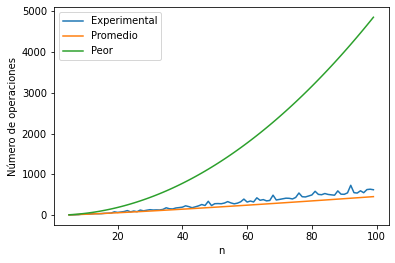

In [ ]:
import matplotlib.pyplot as plt
from math import log

x=[n for n in range(5,100)]

y_best = []
y_promedio= [n*log(n) for n in range(5,100)]
y_peor=[n*(n-1)/2 for n in range(5,100)]

for n in range(5,100):
  a = random.sample(range(1, 100), n)
  h= len(a) - 1
  t= quicksort(a, 0, h, 0) 
  y_best.append(t)

plt.plot(x,y_best)
plt.plot(x,y_promedio)
plt.plot(x,y_peor)
plt.legend(["Experimental", "Promedio","Peor"])

plt.xlabel('n')
plt.ylabel('Número de operaciones')
plt.show()


## 5.2. Tiempo de ejecución (experimental)

En el siguiente gráfico se reporta el tiempo de ejecución del algoritmo **QuickSort** en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $500$.

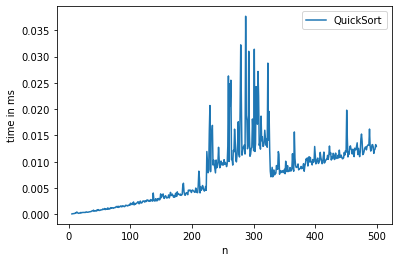

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  h= len(a) - 1
  t = repeat(setup="from __main__ import quicksort", stmt=f"quicksort{a, 0, h, 0}", repeat=1, number=10)

  x.append(n)
  y.append(t)


plt.plot(x,y)
plt.legend(["QuickSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

##5.3 Comparacion QuickSort y MergeSort

In [ ]:
def mergeSort(arr):
    if len(arr) > 1:
        mid = len(arr)//2
        L = arr[:mid]
        R = arr[mid:]
        mergeSort(L)
        mergeSort(R)
        i = j = k = 0
        while i < len(L) and j < len(R):

            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
  
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
  


  
def printList(arr):
    for i in range(len(arr)):
        print(arr[i], end=" ")
    print()



In [ ]:
import matplotlib.pyplot as plt
from math import log

x=[n for n in range(5,100)]

y_Quick= []
y_Merge= []

for n in range(5,100):
  a = random.sample(range(1, 100), n)
  h= len(a) - 1
  t= quicksort(a, 0, h, 0) 
  y_Quick.append(t) 

for n in range(5,100):
  a = random.sample(range(1, 100), n)
  i= merge_sort(a) 
  y_Merge.append(i)

plt.plot(x,y_Quick)
plt.plot(x,y_Merge)
plt.legend(["QuickSort","MergeSort"])

plt.xlabel('n')
plt.ylabel('Número de operaciones')
plt.show()

TypeError: ignored